# Baselining Analysis Results Against a Broader Audience

This iPython notebook accompanies the PYLON developer pattern for baselining analysis results.

This notebook assumes that you have access to two indexes with recorded data that you would like to compare. Creating recordings is not covered here although the concepts and considerations are discussed in the pattern article.

## Environment setup

Before we go any further, first we need to include libraries and utility scripts we're using for this notebook.

In [4]:
# This causes charts to be drawn inline
%pylab inline

from datasift import Client
import pandas as pd
import json

%run vizualization.py

Populating the interactive namespace from numpy and matplotlib


## Accounts and indexes for analysis

Next we'll create clients for each index we are comparing. This first, our audience index represents the audience we're studying. The second is the baseline audience we're comparing against.

Here we create a client for each and store the hash for the index we're using. We take this approach as our indexes may be owned by different identities within our account.

In [14]:
# Account with 'audience' index
audience_client = Client("YOUR USERNAME", "IDENTITY 1 API KEY")
audience_hash = 'AUDIENCE INDEX HASH'

# Account with 'baseline' index
baseline_client = Client("YOUR USERNAME", "IDENTITY 2 API KEY")
baseline_hash = 'BASELINE INDEX HASH'

## Analysis without baseline

Before we perform baselined analysis let's perform some basic analysis on the audience index.

*Note that in each example we'll use the functions brought in from the **vizualization.py** script. This script contains visualization functions that are explained in the charting example notebooks also in this repository.*

Firslty let's analyze our audience's activity using a time series analysis request. Note we're using the audience client and audience hash we declared above. We can use the **chart_timeseries** function to visualize the result.

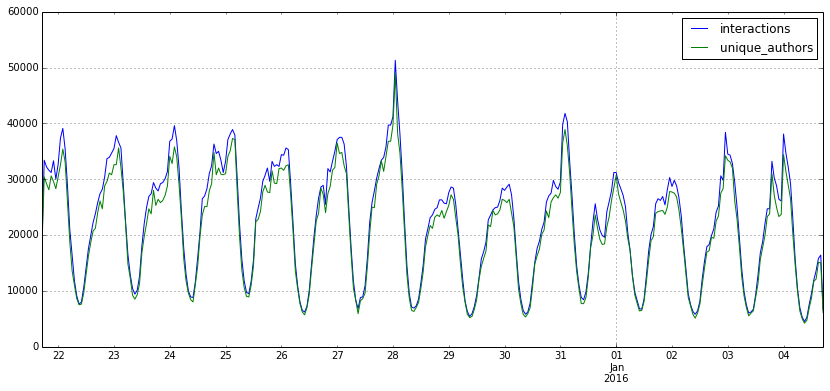

In [6]:
analyze_parameters = {
    'analysis_type': 'timeSeries',
    'parameters':
    {
        'span': 1,
        'interval': 'hour'
    }
}

ts_audience = audience_client.pylon.analyze(audience_hash, analyze_parameters)

chart_timeseries(ts_audience)

Another typical analysis you might want to perform is to look at the breakdown of interactions an audience creates. We can take a look at this using a frequency distribution analysis, based on the fb.type target. 

Again we can easily visualize the result using the **chart_freqdist** function.

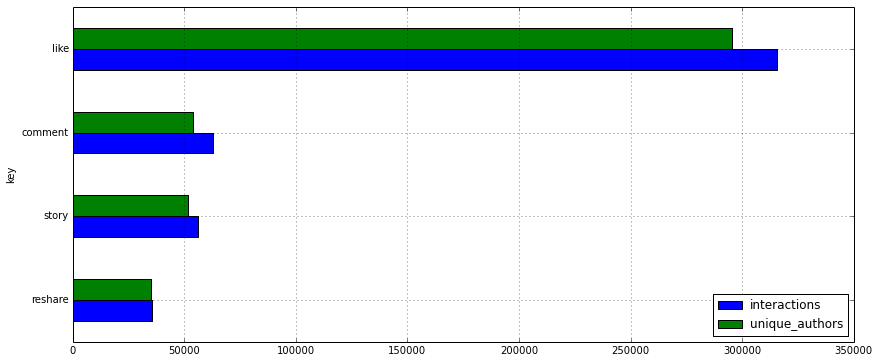

In [7]:
analyze_parameters = {
  "analysis_type": "freqDist",
  "parameters": {
    "target": "fb.type",
    "threshold": 4
  }
}

fd_audience = audience_client.pylon.analyze(audience_hash, analyze_parameters)
chart_freqdist(fd_audience)

One more example analysis is an age-gender breakdown. As this is such a common breakdown the visualization script includes a function called **chart_agegender** specifically for this analysis.

Notice here we're using a nested query for the analysis.

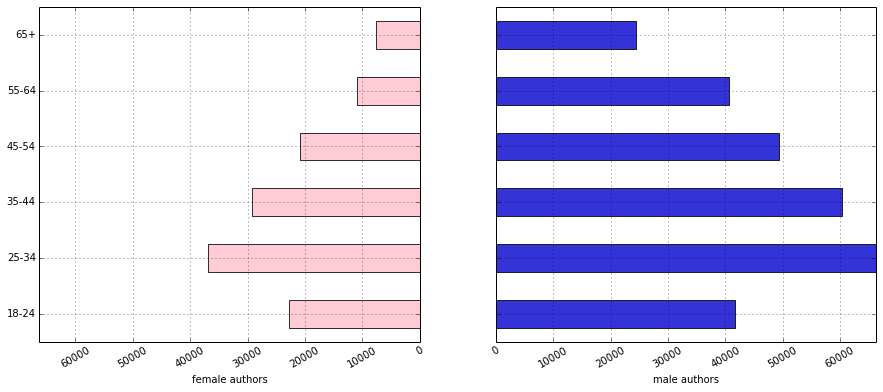

In [8]:
analyze_parameters = {
  "analysis_type": "freqDist",
  "parameters": {
    "target": "fb.author.gender",
    "threshold": 2
  },
  "child": {
    "analysis_type": "freqDist",
    "parameters": {
      "target": "fb.author.age",
      "threshold": 6
    }
  }
}

agegender_audience = audience_client.pylon.analyze(audience_hash, analyze_parameters)
chart_agegender(agegender_audience)

## Checking the state of the baseline index

As discussed in the pattern article, when you record a baseline index it is important to analyze the data recorded to check it is suitable for your baselining.

Here we take a look at a timeseries to ensure we're recording a constant stream of data and aren't hitting our recording limits.

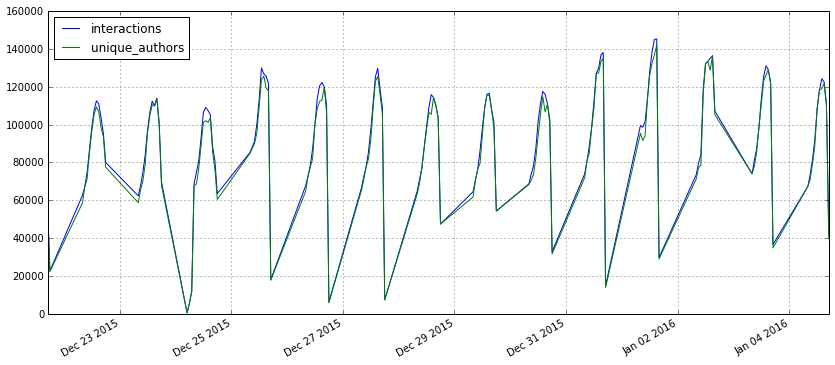

In [9]:
analyze_parameters = {
    'analysis_type': 'timeSeries',
    'parameters':
    {
        'span': 1,
        'interval': 'hour'
    }
}

chart_timeseries(baseline_client.pylon.analyze(baseline_hash, analyze_parameters))

Another aspect to check is how your audience breaks down across locations. Here we take a look at how the baseline audience is distributed across countries. You may find that one country dominates your baseline - depending on your use case you may wish to change your interaction filter to more evenly distribute your audience. 

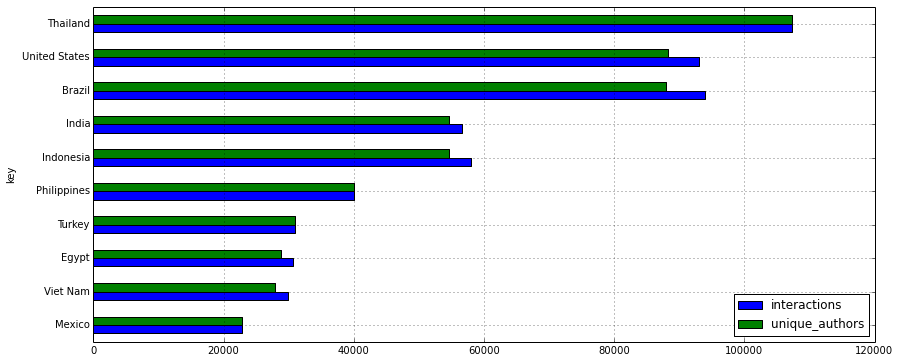

In [10]:
analyze_parameters = {
  "analysis_type": "freqDist",
  "parameters": {
    "target": "fb.author.country",
    "threshold": 10
  }
}

chart_freqdist(baseline_client.pylon.analyze(baseline_hash, analyze_parameters))

Of course there are many other aspect you might want to check based on your use case.

## Analysis with baseline

If you're happy with both of your recordings you can start to compare your audience with your baseline audience.

For example you could firstly repeat the time series analysis we started with. 

Here we reuse **ts_audience** result from above that represents the audience and repeat the query for the baseline audience. We can use the **chart_timeseries_baseline_interactions** function to draw both results on one chart for easy comparision. 

We draw both an 'absolute value' and 'normalized' version of the chart. The absolute value chart simply plots both analysis results on the same chart. The normalized chart firstly normalizes the results by the sum of the results, effectively bringing the distributions to the same scale, making the results easier to compare. In most use cases this makes sense as you want to look for differences in 'shape' rather than absolute values as the audiences sizes are different.

*Note that the **chart_timeseries_baseline_interactions** function takes an optional argument called normalized. When True this argument will normalize both results before plotting so the analysis is easy to compare.*

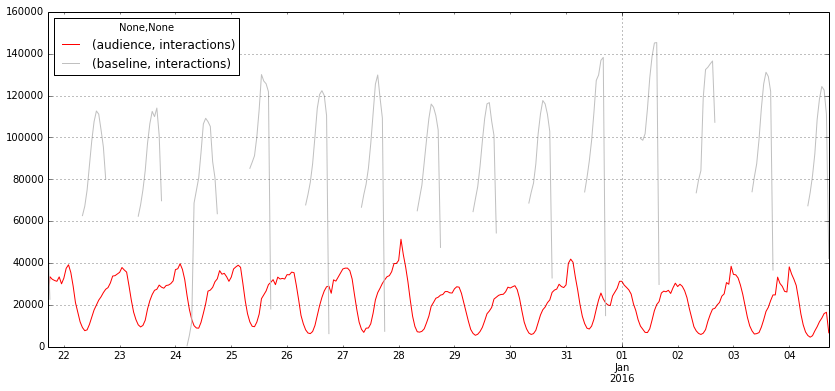

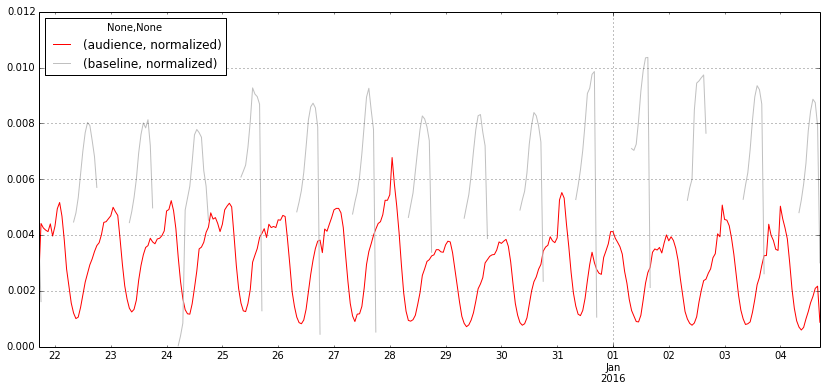

In [11]:
analyze_parameters = {
    'analysis_type': 'timeSeries',
    'parameters':
    {
        'span': 1,
        'interval': 'hour'
    }
}

ts_baseline = baseline_client.pylon.analyze(baseline_hash, analyze_parameters)

# Absolute comparison
chart_timeseries_baseline_interactions(ts_audience, ts_baseline, normalized=False)

# Normalized comparison
chart_timeseries_baseline_interactions(ts_audience, ts_baseline, normalized=True)

We can take the same approach to compare the interaction type breakdown. The **chart_freqdist_baseline_uniqueauthors** function allows us to plot two freqDist analysis on one chart. Again we have the option of normalizing the results before plotting. 

*Note that here the grey bars represent the baseline audience and the blue bars represent the audience we're studying.*

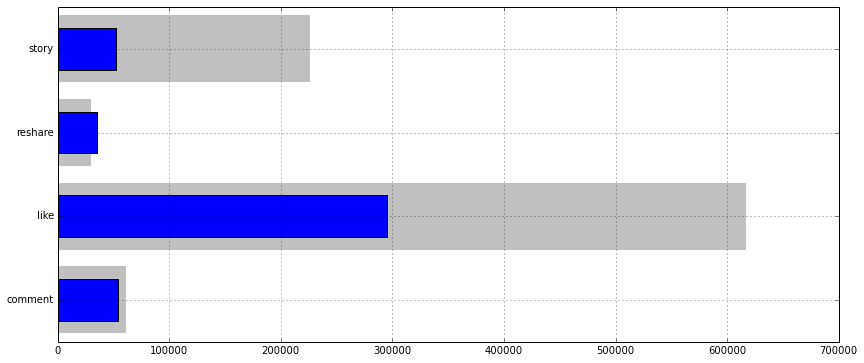

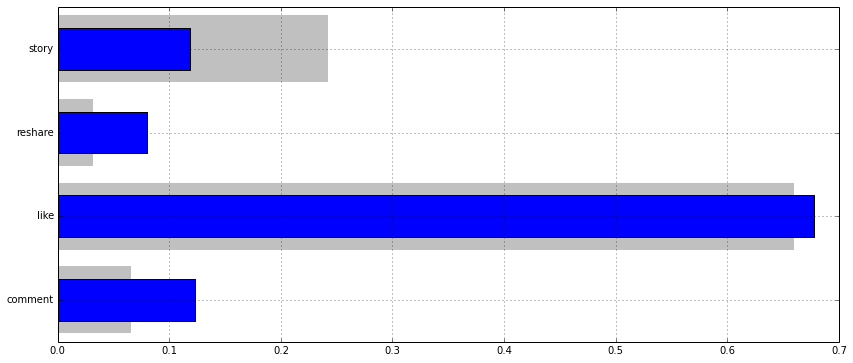

In [12]:
analyze_parameters = {
  "analysis_type": "freqDist",
  "parameters": {
    "target": "fb.type",
    "threshold": 4
  }
}

fd_baseline = baseline_client.pylon.analyze(baseline_hash, analyze_parameters)

# Absolute comparison
chart_freqdist_baseline_uniqueauthors(fd_audience, fd_baseline, normalized=False)

# Normalized comparison
chart_freqdist_baseline_uniqueauthors(fd_audience, fd_baseline)

Finally we can baseline our age-gender breakdown too. The **chart_agegender_baselined** function allows us to plot two age-gender results on one chart. Again the results can optionally be normalized before plotting.

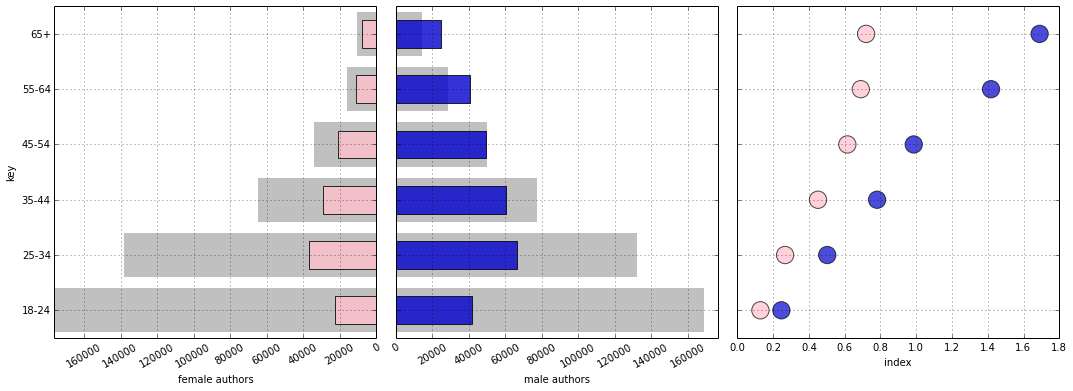

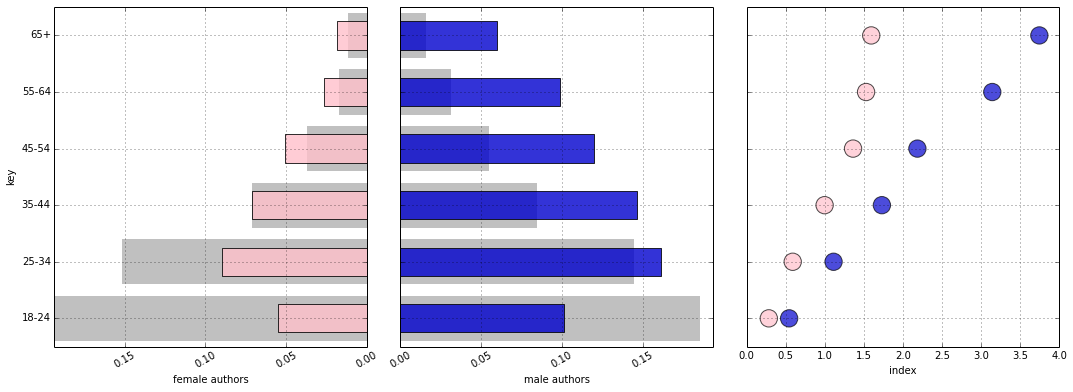

In [13]:
analyze_parameters = {
  "analysis_type": "freqDist",
  "parameters": {
    "target": "fb.author.gender",
    "threshold": 2
  },
  "child": {
    "analysis_type": "freqDist",
    "parameters": {
      "target": "fb.author.age",
      "threshold": 6
    }
  }
}

agegender_baseline = baseline_client.pylon.analyze(baseline_hash, analyze_parameters)

# Absolute comparison
chart_agegender_baselined(agegender_audience, agegender_baseline, normalized=False)

# Normalized comparison
chart_agegender_baselined(agegender_audience, agegender_baseline)